# Pymaceuticals Inc.
---

### Analysis

- Here we are given two csv files containing "Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)". From this data we are able to see the Mean Tumor Volume	Median Tumor Volume	Tumor Volume Variance	Tumor Volume Std. Dev.	Tumor Volume Std. Err. as well. Using these fields we will create some graphs to help us understand the data even better with bar charts, pie charts, box and whisker plots, and scatter plots.

### Observation

- From what I can see Capomulin and Ramicane had the lowest mean tumor and tumor volume standard error (40mm3 and .32). To me this would suggest that they are the most effective at reducing a tumor size as the placebo's numbers were much higher (54mm3 and .58). The other drugs seem to be around the placebo's number suggesting that they are not very effective/not effective.
- There was one mouse that was taking Infubinol that saw a significant decrease in tumor size but after creating a box and whisker plot, we can clearly see that this is an outlier, making that data-point not as useful and might have been a one off circumstance (other factors might have played a roll as well).
- There seems to be a correlation to the weight of the mouse and the size of the tumor they have. using the last scatter-plot with a line of regression we see that the r-squared is: 0.7088568047708723 making it a very high correlation.


In [300]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [301]:
# Checking the number of mice.
len(mouse_data_complete["Mouse ID"].unique())

249

In [302]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup = mouse_data_complete.loc[mouse_data_complete.duplicated(["Mouse ID","Timepoint"],keep=False),"Mouse ID"].unique()
mouse_dup


array(['g989'], dtype=object)

In [303]:
# Optional: Get all the data for the duplicate mouse ID. 
all_mouse_dup_data = mouse_data_complete.loc[mouse_data_complete["Mouse ID"]=="g989"]
all_mouse_dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [304]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data_complete.drop(all_mouse_dup_data.index)
mouse_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [305]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data_clean["Mouse ID"].unique())

248

## Summary Statistics

In [306]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_drugs = mouse_data_clean["Tumor Volume (mm3)"].groupby(mouse_data_clean["Drug Regimen"]).mean()
median_drugs = mouse_data_clean["Tumor Volume (mm3)"].groupby(mouse_data_clean["Drug Regimen"]).median()
var_drugs = mouse_data_clean["Tumor Volume (mm3)"].groupby(mouse_data_clean["Drug Regimen"]).var()
std_drugs = mouse_data_clean["Tumor Volume (mm3)"].groupby(mouse_data_clean["Drug Regimen"]).std()
sem_drugs = mouse_data_clean["Tumor Volume (mm3)"].groupby(mouse_data_clean["Drug Regimen"]).sem()

drug_dataframe = pd.DataFrame({"Mean Tumor Volume":mean_drugs, 
                            "Median Tumor Volume":median_drugs, 
                           "Tumor Volume Variance":var_drugs, 
                           "Tumor Volume Std. Dev.":std_drugs, 
                           "Tumor Volume Std. Err.":sem_drugs})
drug_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [307]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_agg =  mouse_data_clean.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
drug_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

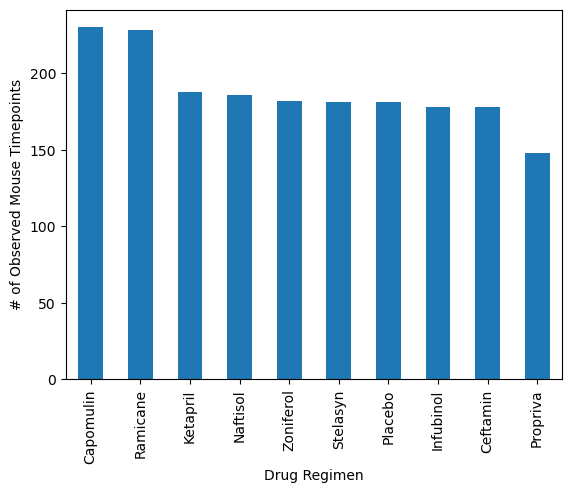

In [308]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_data_clean["Drug Regimen"].value_counts().plot(kind="bar",ylabel="# of Observed Mouse Timepoints")

Text(0, 0.5, '# of Observed Mouse Timepoints')

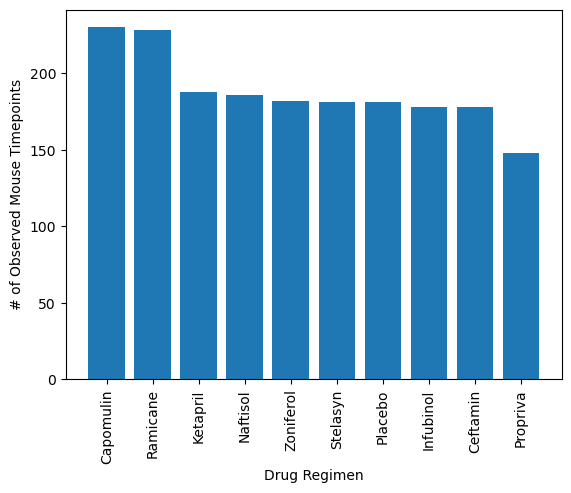

In [309]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x=mouse_data_clean["Drug Regimen"].unique()
y=mouse_data_clean["Drug Regimen"].value_counts()

plot_mouse = plt.bar(x,y)  


plt.xlabel("Drug Regimen")
plt.xticks(np.arange(10), ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", 
                           "Placebo", "Infubinol","Ceftamin", "Propriva"], rotation="vertical")
plt.ylabel("# of Observed Mouse Timepoints")

<Axes: ylabel='Sex'>

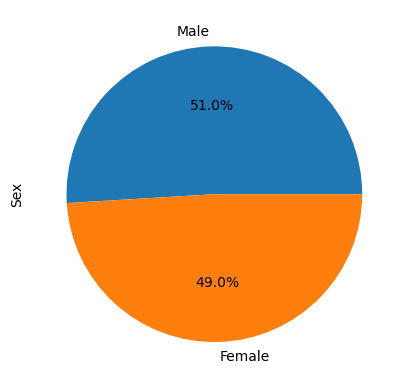

In [310]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_data_clean["Sex"].value_counts().plot(kind="pie",label="Sex", autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

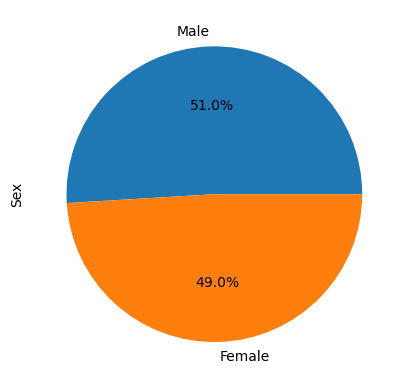

In [311]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_data_clean["Sex"].value_counts(),labels=["Male","Female"],autopct="%1.1f%%",)
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [312]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = mouse_data_clean.groupby(["Mouse ID"])["Timepoint"].max()
final_timepoint = final_timepoint.reset_index()
final_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_merge = final_timepoint.merge(mouse_data_clean, on=["Mouse ID", "Timepoint"], how="left")
final_timepoint_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [313]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    all_drug=final_timepoint_merge.loc[final_timepoint_merge["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(all_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = all_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = all_drug.loc[(all_drug < lower_bound) | (all_drug > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


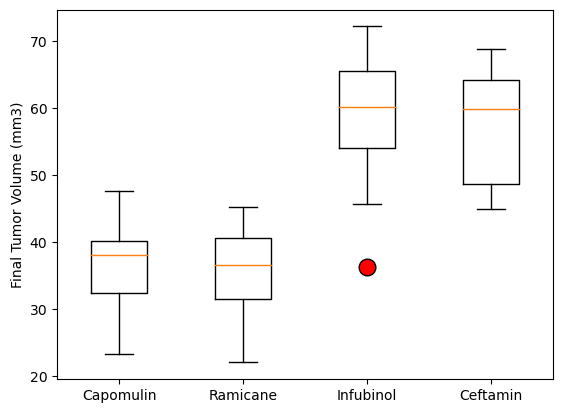

In [314]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, flierprops = dict(markerfacecolor = "red",markersize= 12))
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

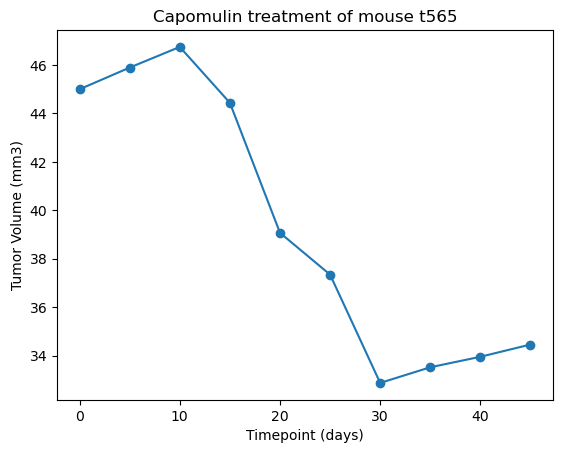

In [315]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_t565 = mouse_data_clean.loc[mouse_data_clean["Mouse ID"]=="t565"]
mouse_t565_vol = mouse_t565["Tumor Volume (mm3)"]
fig2, ax2 = plt.subplots()
ax2.set_title("Capomulin treatment of mouse t565")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.set_xlabel("Timepoint (days)")
plt.plot(mouse_t565["Timepoint"],mouse_t565_vol,marker="o")
plt.show()

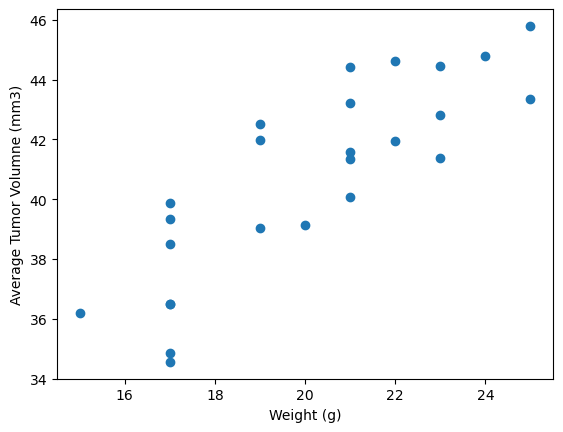

In [316]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_data = mouse_data_clean.loc[mouse_data_clean["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
fig3, ax3 = plt.subplots()
ax3.set_ylabel("Average Tumor Volumne (mm3)")
ax3.set_xlabel("Weight (g)")
plt.scatter(cap_data["Weight (g)"],cap_data["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

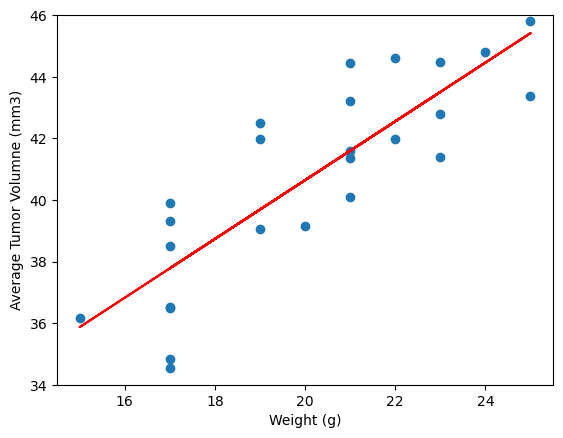

The r-squared is: 0.7088568047708723


In [317]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy import stats
cap_data = mouse_data_clean.loc[mouse_data_clean["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(cap_data["Weight (g)"],cap_data["Tumor Volume (mm3)"])
pe_fit = pe_slope * cap_data + pe_int
fig3, ax3 = plt.subplots()
ax3.set_ylabel("Average Tumor Volumne (mm3)")
ax3.set_xlabel("Weight (g)")
plt.scatter(cap_data["Weight (g)"],cap_data["Tumor Volume (mm3)"])
plt.plot(cap_data,pe_fit,color="red")
plt.xlim(14.5, 25.5)
plt.ylim(34, 46)
plt.show()
print(f"The r-squared is: {pe_r**2}")